In [2]:
from geoplot import utils
import geoplot as gplt
from geoplot import crs as gcrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [3]:
savefig_kwargs = {'bbox_inches': 'tight', 'pad_inches': 0.25}

In [3]:
!mkdir ../docs/figures/pointplot
!mkdir ../docs/figures/kdeplot
!mkdir ../docs/figures/polyplot
!mkdir ../docs/figures/cartogram
!mkdir ../docs/figures/sankey
!mkdir ../docs/figures/choropleth
!mkdir ../docs/figures/voronoi
!mkdir ../docs/figures/quadtree
!mkdir ../docs/figures/webmap

mkdir: ../docs/figures/pointplot: File exists
mkdir: ../docs/figures/kdeplot: File exists
mkdir: ../docs/figures/polyplot: File exists
mkdir: ../docs/figures/cartogram: File exists
mkdir: ../docs/figures/sankey: File exists
mkdir: ../docs/figures/choropleth: File exists
mkdir: ../docs/figures/voronoi: File exists
mkdir: ../docs/figures/quadtree: File exists
mkdir: ../docs/figures/webmap: File exists


# Pointplot

In [4]:
cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))

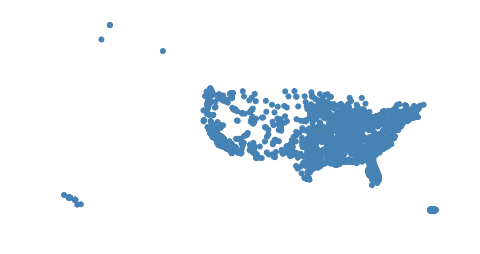

In [5]:
gplt.pointplot(cities)
plt.savefig('../docs/figures/pointplot/pointplot-initial.png', **savefig_kwargs)

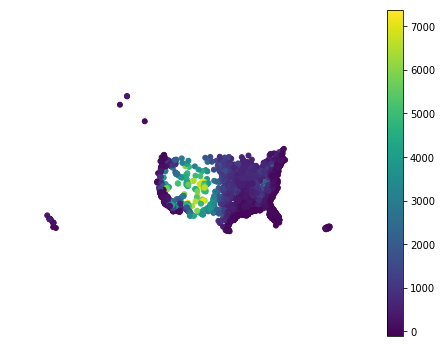

In [6]:
gplt.pointplot(cities, projection=gcrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)
plt.savefig('../docs/figures/pointplot/pointplot-legend.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


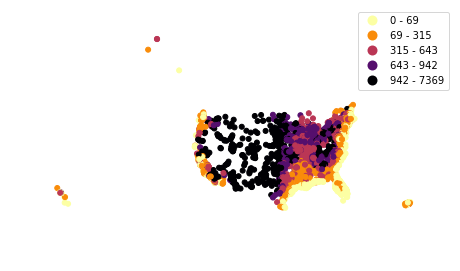

In [31]:
import mapclassify as mc
scheme = mc.Quantiles(cities['ELEV_IN_FT'], k=5)

gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(),
    hue='ELEV_IN_FT', scheme=scheme, cmap='inferno_r',
    legend=True
)
plt.savefig('../docs/figures/pointplot/pointplot-k.png', **savefig_kwargs)

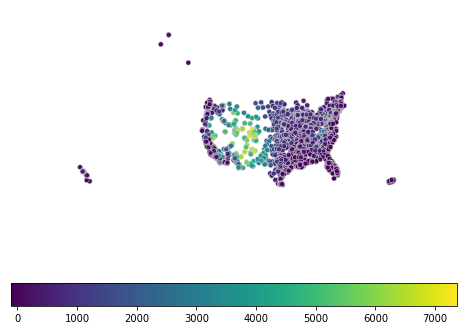

In [8]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT',
    legend=True, legend_kwargs={'orientation': 'horizontal'},
    edgecolor='lightgray', linewidth=0.5
)
plt.savefig('../docs/figures/pointplot/pointplot-kwargs.png', **savefig_kwargs)

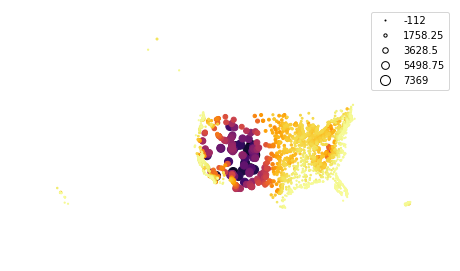

In [9]:
gplt.pointplot(
    cities, projection=gcrs.AlbersEqualArea(), 
    hue='ELEV_IN_FT', scale='ELEV_IN_FT', limits=(1, 10), cmap='inferno_r',
    legend=True, legend_var='scale'
)
plt.savefig('../docs/figures/pointplot/pointplot-scale.png', **savefig_kwargs)

# Polyplot

In [11]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

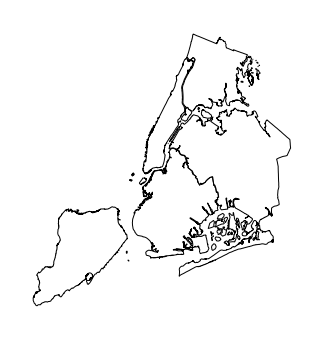

In [12]:
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
plt.savefig('../docs/figures/polyplot/polyplot-initial.png', **savefig_kwargs)

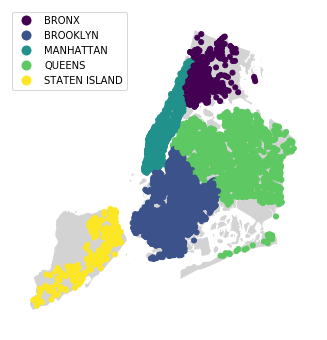

In [13]:
ax = gplt.polyplot(
    boroughs, projection=gcrs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray'
)
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()],
    hue='BOROUGH', ax=ax, legend=True
)
plt.savefig('../docs/figures/polyplot/polyplot-stacked.png', **savefig_kwargs)

# Webmap

In [14]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

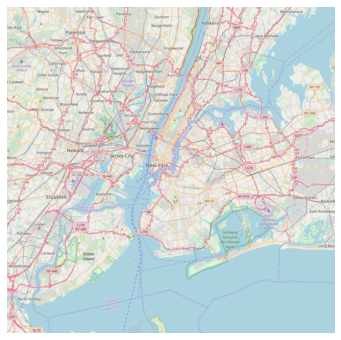

In [15]:
gplt.webmap(boroughs, projection=gcrs.WebMercator())
plt.savefig('../docs/figures/webmap/webmap-initial.png', **savefig_kwargs)

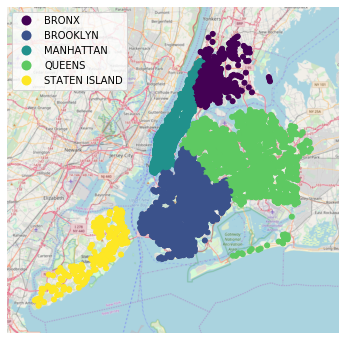

In [16]:
ax = gplt.webmap(boroughs, projection=gcrs.WebMercator())
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()],
    hue='BOROUGH', ax=ax, legend=True
)
plt.savefig('../docs/figures/webmap/webmap-stacked.png', **savefig_kwargs)

# Choropleth

In [17]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

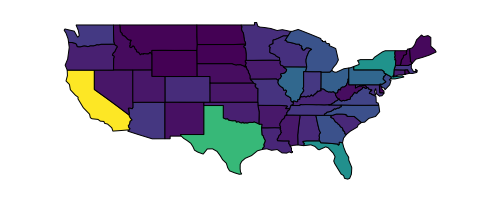

In [18]:
gplt.choropleth(contiguous_usa, hue='population')
plt.savefig('../docs/figures/choropleth/choropleth-initial.png', **savefig_kwargs)

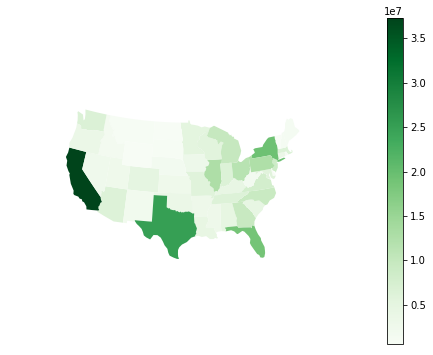

In [26]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    cmap='Greens', legend=True
)
plt.savefig('../docs/figures/choropleth/choropleth-cmap.png', **savefig_kwargs)

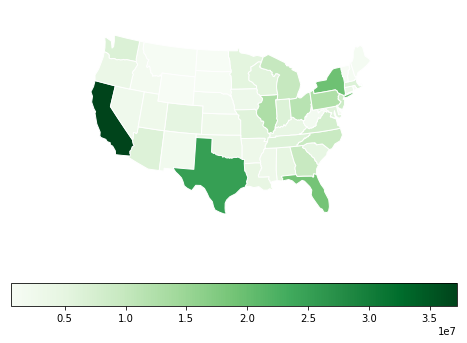

In [35]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'orientation': 'horizontal'}
)
plt.savefig('../docs/figures/choropleth/choropleth-legend-kwargs.png', **savefig_kwargs)

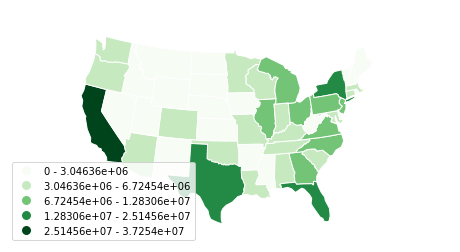

In [37]:
import mapclassify as mc
scheme = mc.FisherJenks(contiguous_usa['population'], k=5)
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens',
    legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme
)
plt.savefig('../docs/figures/choropleth/choropleth-scheme.png', **savefig_kwargs)

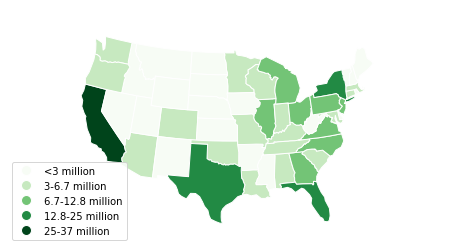

In [38]:
import mapclassify as mc
scheme = mc.FisherJenks(contiguous_usa['population'], k=5)
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme,
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)
plt.savefig('../docs/figures/choropleth/choropleth-labels.png', **savefig_kwargs)

## KDEPlot

In [57]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


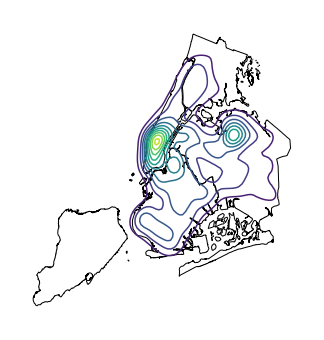

In [58]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../docs/figures/kdeplot/kdeplot-initial.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


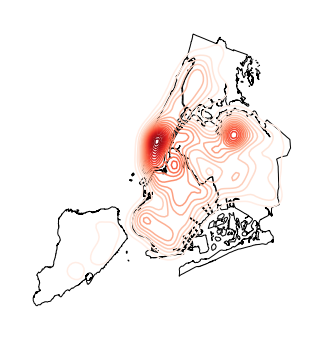

In [59]:
ax = gplt.kdeplot(collisions, projection=gcrs.AlbersEqualArea(), n_levels=20, cmap='Reds')
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../docs/figures/kdeplot/kdeplot-shade.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


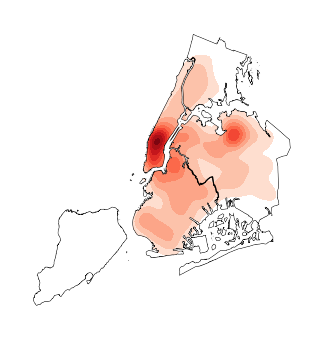

In [60]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True,
    clip=boroughs
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../docs/figures/kdeplot/kdeplot-clip.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


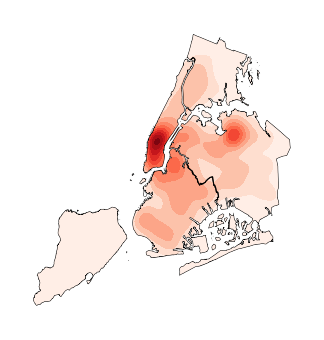

In [61]:
ax = gplt.kdeplot(
    collisions, projection=gcrs.AlbersEqualArea(), cmap='Reds',
    shade=True, shade_lowest=True,
    clip=boroughs.geometry
)
gplt.polyplot(boroughs, ax=ax, zorder=1)
plt.savefig('../docs/figures/kdeplot/kdeplot-shade-lowest.png', **savefig_kwargs)

# Cartogram

In [5]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

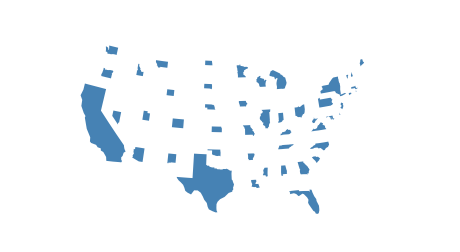

In [10]:
gplt.cartogram(contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea())
plt.savefig('../docs/figures/cartogram/cartogram-initial.png', **savefig_kwargs)

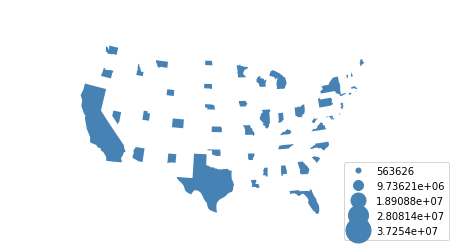

In [11]:
gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'loc': 'lower right'}
)
plt.savefig('../docs/figures/cartogram/cartogram-trace-legend.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


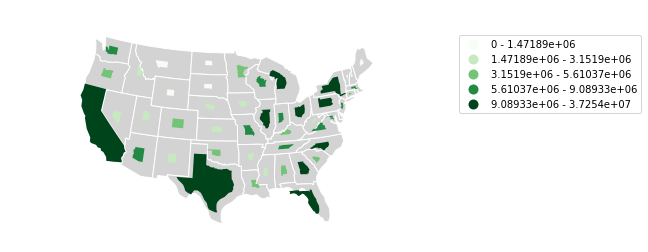

In [40]:
import mapclassify as mc
scheme = mc.Quantiles(contiguous_usa['population'], k=5)
ax = gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='population', scheme=scheme, cmap='Greens'
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='white', ax=ax)
plt.savefig('../docs/figures/cartogram/cartogram-cmap.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


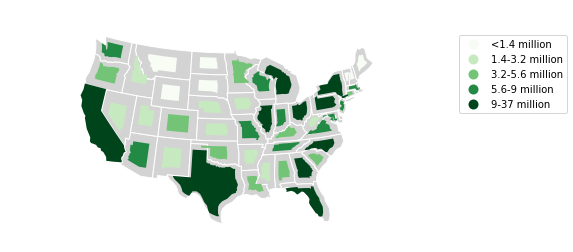

In [41]:
import mapclassify as mc
scheme = mc.Quantiles(contiguous_usa['population'], k=5)
ax = gplt.cartogram(
    contiguous_usa, scale='population', projection=gcrs.AlbersEqualArea(),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='population', scheme=scheme, cmap='Greens',
    legend_labels=[
        '<1.4 million', '1.4-3.2 million', '3.2-5.6 million',
        '5.6-9 million', '9-37 million'
    ],    
    limits=(0.5, 1)
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='white', ax=ax)
plt.savefig('../docs/figures/cartogram/cartogram-limits.png', **savefig_kwargs)

## Sankey

In [43]:
la_flights = gpd.read_file(gplt.datasets.get_path('la_flights'))
world = gpd.read_file(gplt.datasets.get_path('world'))
dc = gpd.read_file(gplt.datasets.get_path('dc_roads'))

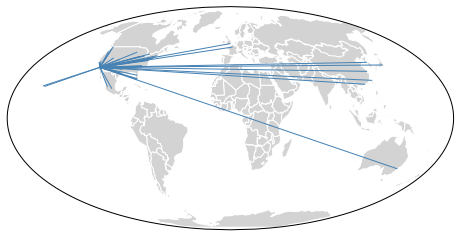

In [44]:
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide()
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../docs/figures/sankey/sankey-geospatial-context.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


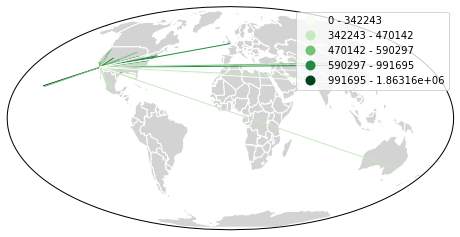

In [47]:
import mapclassify as mc
scheme = mc.Quantiles(la_flights['Passengers'], k=5)
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    hue='Passengers', cmap='Greens', scheme=scheme, legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../docs/figures/sankey/sankey-cmap.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alex/Desktop/geoplot/geoplot/geoplot.py:249: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


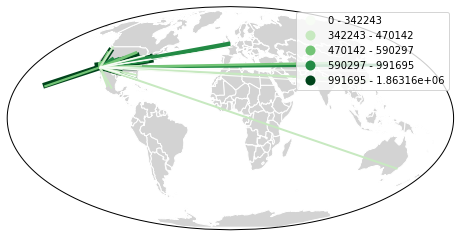

In [48]:
import mapclassify as mc
scheme = mc.Quantiles(la_flights['Passengers'], k=5)
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', cmap='Greens', scheme=scheme, legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../docs/figures/sankey/sankey-scale.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alex/Desktop/geoplot/geoplot/geoplot.py:249: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


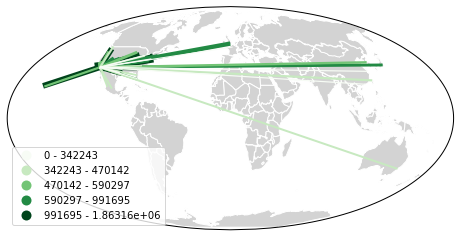

In [49]:
import mapclassify as mc
scheme = mc.Quantiles(la_flights['Passengers'], k=5)
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', limits=(1, 10),
    hue='Passengers', scheme=scheme, cmap='Greens',
    legend=True, legend_kwargs={'loc': 'lower left'}
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)
plt.savefig('../docs/figures/sankey/sankey-legend-kwargs.png', **savefig_kwargs)

## Voronoi

In [51]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
injurious_collisions = gpd.read_file(gplt.datasets.get_path('nyc_injurious_collisions'))

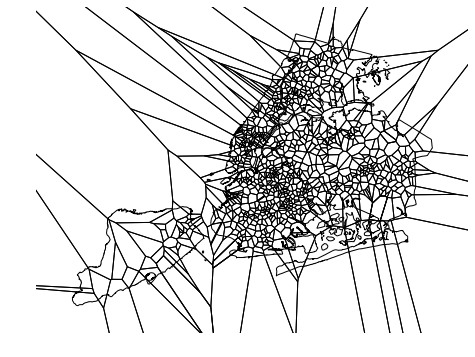

In [66]:
ax = gplt.voronoi(injurious_collisions.head(1000))
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../docs/figures/voronoi/voronoi-simple.png', **savefig_kwargs)

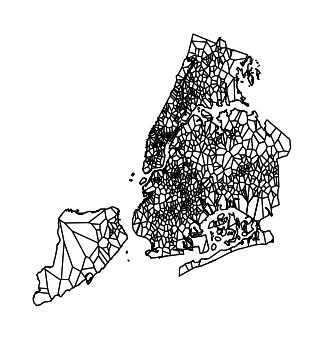

In [67]:
ax = gplt.voronoi(
    injurious_collisions.head(1000),
    clip=boroughs.simplify(0.001), projection=gcrs.AlbersEqualArea()
)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../docs/figures/voronoi/voronoi-clip.png', **savefig_kwargs)

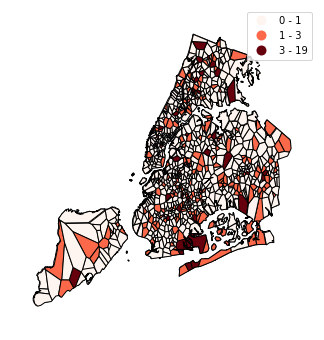

In [58]:
import mapclassify as mc
scheme = mc.NaturalBreaks(injurious_collisions['NUMBER OF PERSONS INJURED'], k=3)
ax = gplt.voronoi(
    injurious_collisions.head(1000), projection=gcrs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', scheme=scheme, cmap='Reds',
    legend=True
)
gplt.polyplot(boroughs, ax=ax)
plt.savefig('../docs/figures/voronoi/voronoi-cmap.png', **savefig_kwargs)

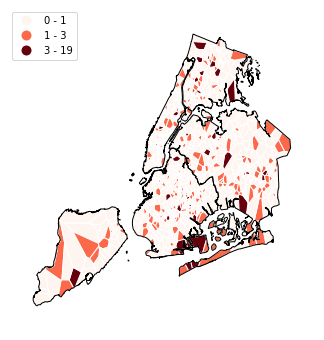

In [59]:
import mapclassify as mc
scheme = mc.NaturalBreaks(injurious_collisions['NUMBER OF PERSONS INJURED'], k=3)
ax = gplt.voronoi(
    injurious_collisions.head(1000), projection=gcrs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', scheme=scheme, cmap='Reds',
    legend=True,
    edgecolor='white', legend_kwargs={'loc': 'upper left'}
)
gplt.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)
plt.savefig('../docs/figures/voronoi/voronoi-kwargs.png', **savefig_kwargs)

# Quadtree

In [60]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

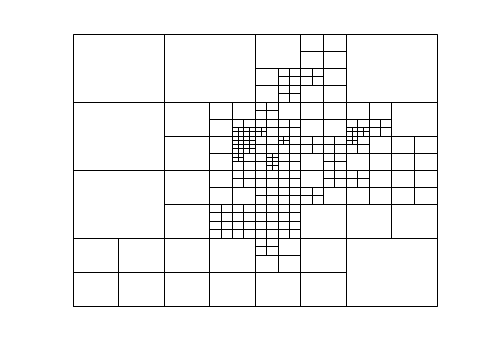

In [61]:
gplt.quadtree(collisions, nmax=1)
plt.savefig('../docs/figures/quadtree/quadtree-initial.png', **savefig_kwargs)

/Users/alex/Desktop/geoplot/geoplot/geoplot.py:453: UserWarning: The input data contains 9 data points that do not intersect with "clip". These data points will not appear in the plot.
  f'The input data contains {null_geoms.sum()} data points that do not '


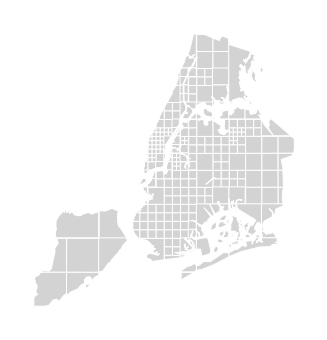

In [62]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    facecolor='lightgray', edgecolor='white'
)
plt.savefig('../docs/figures/quadtree/quadtree-clip.png', **savefig_kwargs)

/Users/alex/Desktop/geoplot/geoplot/geoplot.py:448: UserWarning: The input data contains 9 data points that do not intersect with "clip". These data points will not appear in the plot.
  f'The input data contains {null_geoms.sum()} data points that do not '


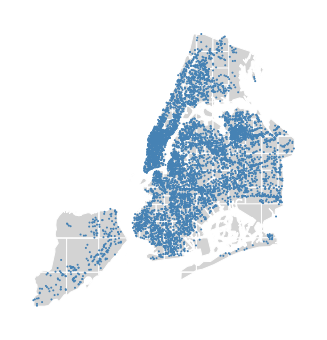

In [79]:
ax = gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    facecolor='lightgray', edgecolor='white', zorder=0
)
gplt.pointplot(
    collisions,
    s=1, ax=ax
)
plt.savefig('../docs/figures/quadtree/quadtree-basemap.png', **savefig_kwargs)

/Users/alex/Desktop/geoplot/geoplot/geoplot.py:448: UserWarning: The input data contains 9 data points that do not intersect with "clip". These data points will not appear in the plot.
  f'The input data contains {null_geoms.sum()} data points that do not '


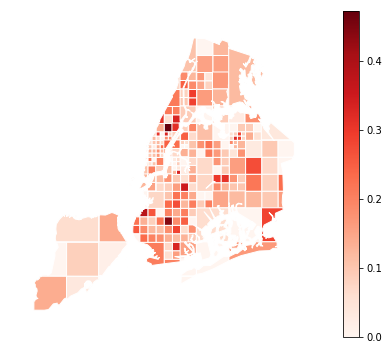

In [77]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', k=None,
    edgecolor='white', legend=True,
)
plt.savefig('../docs/figures/quadtree/quadtree-k.png', **savefig_kwargs)

/Users/alex/miniconda3/envs/geoplot-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/alex/Desktop/geoplot/geoplot/geoplot.py:453: UserWarning: The input data contains 9 data points that do not intersect with "clip". These data points will not appear in the plot.
  f'The input data contains {null_geoms.sum()} data points that do not '


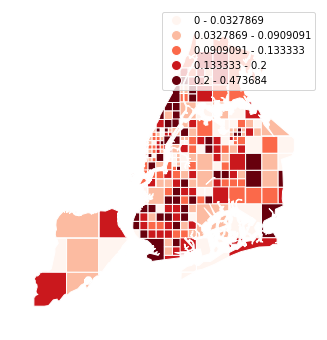

In [65]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', scheme='Quantiles',
    edgecolor='white', legend=True
)
plt.savefig('../docs/figures/quadtree/quadtree-hue.png', **savefig_kwargs)

/Users/alex/Desktop/geoplot/geoplot/geoplot.py:448: UserWarning: The input data contains 9 data points that do not intersect with "clip". These data points will not appear in the plot.
  f'The input data contains {null_geoms.sum()} data points that do not '


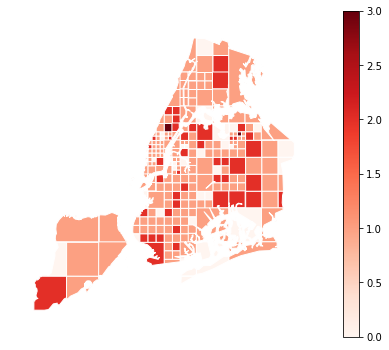

In [78]:
gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=boroughs.simplify(0.001),
    hue='NUMBER OF PEDESTRIANS INJURED', cmap='Reds', agg=np.max,
    edgecolor='white', legend=True, k=None
)
plt.savefig('../docs/figures/quadtree/quadtree-agg.png', **savefig_kwargs)